In [16]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import nltk 
import re
import string
import streamlit as st
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [3]:
data = pd.read_csv('train_data (1).csv')
#rename the columns
name = ['comment', 'outcome']
data.columns = name
data.head()

,comment,outcome
0,"This film is absolutely awful, but nevertheles...",0
1,Well since seeing part's 1 through 3 I can hon...,0
2,I got to see this film at a preview and was da...,1
3,This adaptation positively butchers a classic ...,0
4,Råzone is an awful movie! It is so simple. It ...,0


In [6]:
# replace the outcome into numerical
data['outcome'] = data['outcome'].replace(0, 'Negative')
data['outcome'] = data['outcome'].replace(1, 'Positive')

negative    12500
positive    12500
Name: outcome, dtype: int64


<AxesSubplot:xlabel='outcome', ylabel='count'>

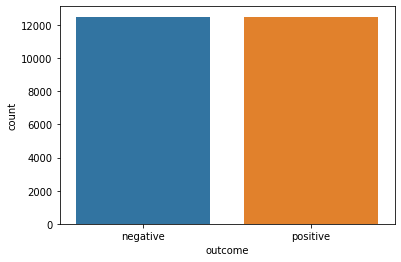

In [11]:
# data cleaning and text preprocessing
print(data['outcome'].value_counts())
sns.countplot(data = data, x = 'outcome')

## Text Preprocessing

In [14]:
# lower the cases
data['comment'] = data['comment'].apply(str.lower)

In [15]:
data['comment'] = data['comment'].apply(lambda x : ''.join(w for w in x.split() if w not in stopwords))

'this film is absolutely awful, but nevertheless, it can be hilarious at times, although this humor is entirely unintentional.<br /><br />the plot was beyond ridiculous. i don\'t even think a 2 year-old would be convinced by the ludicrous idiocy that the film-makers tried to slap together into a story. however, on the positive side, some of the horrifically inane plot twists provide a great deal of humor. for example, "wow, lady hogbottom has a giant missile hidden in her back yard!" it gets worse (and even funnier), but i\'ll spare you.<br /><br />the acting is generally laughable. most of the kids\' roles are sort of cute, but not very believable. on the other hand, annie is pretty awful all-around. the adults don\'t take their roles seriously at all, but this is largely a good thing. if they\'d tried to be believable, the film would\'ve been even worse. which is difficult to imagine.<br /><br />once you get past the overall crappiness of the movie, there are actually a few standout 

The data is balanced since we have an equal number

In [5]:
data_2 = data.apply(tuple, axis = 1)
data_2[1]

("Well since seeing part's 1 through 3 I can honestly say that they should have NEVER made part 4. Everything from the tacky, and I DO mean tacky score to the really bad acting, I dare anyone to watch this and not be bored out of their minds.<br /><br />I mean parts 1 to 3 kept the vibe strong on the plot of Damion, but without him around in this one it's just not the same. Sure by the end of part 3 I was getting a little tired of the continued story line's, but it was a good closure at the end of the third one. Again there was no reason for a part 4. Even if there was they could have done a MUCH better job than this sh*t I had to sit through, lol. There goes an hour and a half of my life i'll never see again.",
 0)

In [6]:
data_2 = list(data_2)
len(data_2)

25000

In [8]:
import river
